Supervised learning algoritmalarını uygulayalım ve confusion matrix ile modeli değerlendirelim.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Airlines.csv")

In [3]:
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


Airlines veri setinde 539383 instance ve 8 farklı özellik bulunmaktadır. Görev, planlanan kalkış bilgisi göz önüne alındığında, belirli bir uçuşun ertelenip ertelenmeyeceğini tahmin etmektir.

In [4]:
data.Delay.unique()

array([1, 0], dtype=int64)

İki tane sınıf bulunmaktadır.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [6]:
data.drop(["Airline","AirportFrom","AirportTo"],axis=1,inplace=True)

In [7]:
data.head()

,id,Flight,DayOfWeek,Time,Length,Delay
0,1,269,3,15,205,1
1,2,1558,3,15,222,1
2,3,2400,3,20,165,1
3,4,2466,3,20,195,1
4,5,108,3,30,202,0


In [8]:
x_data = data.drop(["Delay"],axis=1)

y = data.Delay.values

In [9]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [10]:
#train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

print("Logistic Regression accuracy {}".format(lr.score(x_test,y_test)))


Logistic Regression accuracy 0.5943762939158916


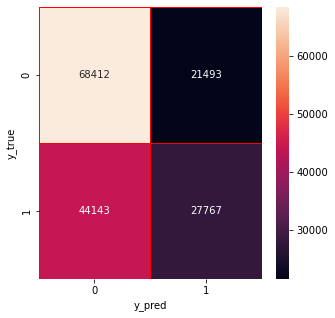

In [12]:
y_pred = lr.predict(x_test)
y_true = y_test

#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

#confusion matrix visualization

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Çıktıyı inceleyelim.

Toplamda 68412+21493=89905 tane 0 sınıfı verisi vardır. 0 sınıfı verilerinin 68412 tanesi doğru tahmin edilmiştir. Gerçek değeri 0 sınıfına ait olan, fakat 1 sınıfına ait tahmini yapılan 21493 tane sample vardır.


Toplamda 44143+27767=71910 tane 1 sınıfı verisi vardır. 1 sınıfı verilerinin 27767 tanesi doğru tahmin edilmiştir. Gerçek değeri 1 sınıfına ait olan, fakat 0 sınıfına ait tahmini yapılan 44143 tane sample vardır.

Toplamda 68412+27767=96179 tane doğru tahmin yapılmıştır. 

Toplamda 21493+44143=65636 tane doğru tahmin yapılmıştır. 

### K-Nearest Neighbour (KNN)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

print("k = {}, knn score : {}".format(3,knn.score(x_test,y_test)))

k = 3, knn score : 0.5769180854679726


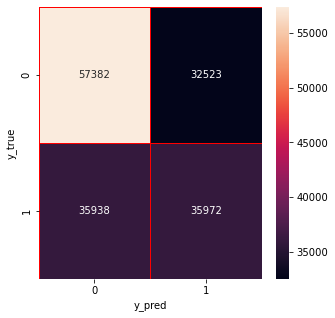

In [14]:
y_pred = knn.predict(x_test)
y_true = y_test

#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

#confusion matrix visualization

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=1) 
svm.fit(x_train,y_train)

print("SVM score: ",svm.score(x_test,y_test))

In [ ]:
y_pred = svm.predict(x_test)
y_true = y_test

#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

#confusion matrix visualization

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

print("Naive Bayes score: ",nb.score(x_test,y_test))

In [ ]:
y_pred = nb.predict(x_test)
y_true = y_test

#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

#confusion matrix visualization

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("decision tree score: ",dt.score(x_test,y_test))

In [ ]:
y_pred = dt.predict(x_test)
y_true = y_test

#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

#confusion matrix visualization

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train,y_train)

print("random forest score:", rf.score(x_test,y_test))

In [ ]:
y_pred = rf.predict(x_test)
y_true = y_test

#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

#confusion matrix visualization

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()